<h1 style="color:black;text-align:center;font-size:300%;font-family:verdana;">
Clustering
</h1>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
# help in finding and showing the desired k for the elbow method
from kneed import KneeLocator
# dendogram for kmeans
import scipy.cluster.hierarchy as sch
# silhouette score
from sklearn.metrics import silhouette_score
# dimension reduction
from sklearn.decomposition import PCA
# visualization
import visuals as vs
# scaler for easier understanding
from sklearn.preprocessing import StandardScaler
# removes unnecessary warnings (for nicer looking graphs)
import warnings
warnings.simplefilter(action='ignore')

In [119]:
# !pip install kneed

## 📁Organizing Relevant Data
___


In [120]:
df = pd.read_csv('clean_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527232 entries, 0 to 527231
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Origin                             527232 non-null  object
 1   Destination                        527232 non-null  object
 2   TTT                                527232 non-null  int64 
 3   LOS                                527232 non-null  int64 
 4   Arrival Time                       527232 non-null  object
 5   Return Arrival Time                527232 non-null  object
 6   Onward Departure Airport           527232 non-null  object
 7   Onward Arrival Airport             527232 non-null  object
 8   Return Departure Airport           527232 non-null  object
 9   Return Arrival Airport             527232 non-null  object
 10  Onward Airlines                    527232 non-null  object
 11  Return Airlines                    527232 non-null  

In [121]:
df.head()

,Origin,Destination,TTT,LOS,Arrival Time,Return Arrival Time,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,...,Departure Time Category Num,Return Time Category Num,Is Weekend Flight,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min),Flight Duration Binned
0,London,Paris,1,1,3/7/2025 16:30,3/8/2025 19:25,SEN,CDG,ORY,LGW,...,2,3,True,64,25,13,45,0,135,0-200
1,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:25,SEN,CDG,ORY,LHR,...,2,2,True,64,25,13,23,0,145,0-200
2,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:50,SEN,CDG,CDG,LGW,...,2,2,True,64,25,25,45,0,135,0-200
3,London,Paris,1,1,3/7/2025 16:30,3/8/2025 12:00,SEN,CDG,ORY,LGW,...,2,1,True,64,25,13,45,0,140,0-200
4,London,Paris,1,1,3/7/2025 16:30,3/8/2025 15:20,SEN,CDG,ORY,LGW,...,2,2,True,64,25,13,45,0,140,0-200


In [122]:
df.describe()

,TTT,LOS,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Total Onward Flight Duration(min),...,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min)
count,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.00000,527232.000000,527232.000000,527232.000000,527232.000000,...,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000
mean,15.527781,2.993612,0.005127,0.921192,0.005280,1.04271,0.112493,0.006261,594.694789,121.181558,...,16.213113,3.013518,1.795703,1.806787,33.516820,33.219298,33.621668,33.153344,0.010407,242.606168
std,8.583505,1.411998,0.072079,21.772410,0.073488,24.15458,0.315973,0.081154,207.361836,44.046941,...,9.099821,1.994234,0.793875,0.803933,16.810686,16.348130,16.894544,16.528630,0.106142,81.497798
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,168.000000,60.000000,...,1.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.000000,130.000000
25%,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,435.000000,80.000000,...,8.000000,1.000000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,0.000000,155.000000
50%,16.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,585.000000,130.000000,...,17.000000,3.000000,2.000000,2.000000,32.000000,32.000000,32.000000,32.000000,0.000000,255.000000
75%,23.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,728.000000,150.000000,...,24.000000,5.000000,2.000000,2.000000,45.000000,45.000000,45.000000,45.000000,0.000000,310.000000
max,30.000000,5.000000,2.000000,1560.000000,2.000000,1785.00000,1.000000,2.000000,1342.000000,2380.000000,...,31.000000,6.000000,3.000000,3.000000,85.000000,85.000000,85.000000,85.000000,3.000000,3635.000000


In [123]:
# filtering the rows where the onward and return airlines are the same (.copy() is to create an independent copy of the dataframe so that it doesn't affect the original dataframe)
df_filtered = df[df['Onward Airlines'] == df['Return Airlines']].copy()

In [124]:
df_filtered.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Arrival Time',
       'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Date', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Month', 'Return Day', 'Return Weekday',
       'Departure Time Category Num', 'Return Time Category Num',
       'Is Weekend Flight', 'Onward Departure Airport Distance',
       'Onward Arrival Airport Distance', 'Return Departure Airport Distance',
       'Return Arrival Airport Distance', 

In [125]:
# taking only the columns that we think can help decide the pricing policy
df_filtered.drop(['Origin', 'Destination', 'Arrival Time', 'Return Arrival Time', 'Onward Departure Airport', 'Onward Arrival Airport',
                  'Return Departure Airport', 'Return Arrival Airport', 'Return Airlines', 'Onward Flight Connection Airport',
                   'Return Flight Connection Airport','Snapshot Date', 'Flight Duration Binned'], axis=1, inplace=True)
# changing the name
df_filtered.rename(columns={'Onward Airlines': 'Airline'}, inplace=True)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248161 entries, 2 to 527222
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   TTT                                248161 non-null  int64 
 1   LOS                                248161 non-null  int64 
 2   Airline                            248161 non-null  object
 3   Onward Flight Connections          248161 non-null  int64 
 4   Onward Connection Duration(min)    248161 non-null  int64 
 5   Return Flight Connections          248161 non-null  int64 
 6   Return Connection Duration(min)    248161 non-null  int64 
 7   Carry-ons                          248161 non-null  int64 
 8   Checked Bags                       248161 non-null  int64 
 9   Price(NIS)                         248161 non-null  int64 
 10  Site                               248161 non-null  object
 11  Total Onward Flight Duration(min)  248161 non-null  int64

In [126]:
# checking for airlines with less than 1% of the data (not enough data to draw conclusions)
airlines_data = df_filtered.groupby('Airline', observed=True)

In [127]:
airlines_data.describe()

TTT                                                \
                      count       mean        std   min   25%   50%   75%   
Airline                                                                     
Air France          13893.0  12.377528   8.655444   1.0   5.0  10.0  20.0   
British Airways     13299.0  20.371306   8.856854   1.0  15.0  24.0  27.0   
ITA Airways          7739.0  13.814446   7.789817   1.0   7.0  13.0  20.0   
Iberia                404.0  11.586634   8.703265   1.0   3.0  10.0  18.0   
Jet2                  413.0  14.193705   7.512854   1.0   8.0  14.0  21.0   
KLM                    23.0  24.565217   3.230903  21.0  21.0  27.0  27.0   
KM Malta Airlines       3.0   5.333333   3.785939   1.0   4.0   7.0   7.5   
Lufthansa               9.0  17.333333   9.219544   8.0  10.0  10.0  26.0   
Ryanair             32836.0  15.787550   8.329783   1.0   9.0  16.0  23.0   
SWISS                   3.0  15.000000  13.527749   1.0   8.5  16.0  22.0   
Transavia France     6666.0  19.858236   8.343498   1.0  14.0  23.0  26.0   
Vueling             45141.0  14.842272   8.510765   1.0   8.0  14.0  22.0   
Wizz Air            14204.0  15.015489   8.254423   1.0   8.0  15.0  22.0   
easyJet            113528.0  15.356388   8.484596   1.0   8.0  15.0  23.0   

                              LOS            ... Total Connections       \
                    max     count      mean  ...               75%  max   
Airline                                      ...                          
Air France         30.0   13893.0  3.424170  ...               0.0  2.0   
British Airways    30.0   13299.0  2.957064  ...               0.0  0.0   
ITA Airways        30.0    7739.0  2.968213  ...               0.0  2.0   
Iberia             30.0     404.0  2.668317  ...               0.0  0.0   
Jet2               29.0     413.0  2.958838  ...               0.0  0.0   
KLM                29.0      23.0  4.478261  ...               2.0  2.0   
KM Malta Airlines   8.0       3.0  2.666667  ...               2.0  2.0   
Lufthansa          28.0       9.0  4.777778  ...               2.0  2.0   
Ryanair            30.0   32836.0  3.020313  ...               0.0  3.0   
SWISS              28.0       3.0  2.333333  ...               2.0  2.0   
Transavia France   30.0    6666.0  2.977948  ...               0.0  0.0   
Vueling            30.0   45141.0  2.949935  ...               0.0  2.0   
Wizz Air           30.0   14204.0  3.016545  ...               0.0  3.0   
easyJet            30.0  113528.0  2.980357  ...               0.0  2.0   

                  Total Flight Duration(min)                                   \
                                       count         mean         std     min   
Airline                                                                         
Air France                           13893.0   252.278486   20.285980   155.0   
British Airways                      13299.0   307.355816   45.222826   140.0   
ITA Airways                           7739.0   265.962011   31.367169   250.0   
Iberia                                 404.0   273.403465   67.789362   140.0   
Jet2                                   413.0   310.000000    0.000000   310.0   
KLM                                     23.0   629.782609   57.731319   545.0   
KM Malta Airlines                        3.0  1233.333333   83.715789  1185.0   
Lufthansa                                9.0   541.666667   15.411035   525.0   
Ryanair                              32836.0   309.717414   80.022303   255.0   
SWISS                                    3.0   560.000000   90.138782   485.0   
Transavia France                      6666.0   256.788179    2.396700   255.0   
Vueling                              45141.0   224.875390   68.041592   140.0   
Wizz Air                             14204.0   315.172135  131.991354   255.0   
easyJet                             113528.0   178.431532   57.198872   130.0   

                                                   
        

In [128]:
grouped = airlines_data['Airline'].value_counts().reset_index()
grouped.columns = ['Airline', 'Count']
grouped

,Airline,Count
0,Air France,13893
1,British Airways,13299
2,ITA Airways,7739
3,Iberia,404
4,Jet2,413
5,KLM,23
6,KM Malta Airlines,3
7,Lufthansa,9
8,Ryanair,32836
9,SWISS,3


In [129]:
grouped['Percentage'] = (grouped['Count'] / grouped['Count'].sum()) * 100
grouped

,Airline,Count,Percentage
0,Air France,13893,5.598382
1,British Airways,13299,5.359021
2,ITA Airways,7739,3.118540
3,Iberia,404,0.162798
4,Jet2,413,0.166424
5,KLM,23,0.009268
6,KM Malta Airlines,3,0.001209
7,Lufthansa,9,0.003627
8,Ryanair,32836,13.231733
9,SWISS,3,0.001209


In [130]:
# if the percentage is less than 1, then we will group them into 'Others' for the following pie chart, and drop the airline from the dataframe
others_count = 0
others_percentage = 0
for i in range(len(grouped)):
    if grouped['Percentage'][i] < 1:
        others_count += grouped['Count'][i]
        others_percentage += grouped['Percentage'][i]
        
        # removeing the airline from the dataframe
        df_filtered = df_filtered[df_filtered['Airline'] != grouped['Airline'][i]]

        grouped = grouped.drop(i)
others = pd.DataFrame({'Airline': ['Others'], 'Count': [others_count], 'Percentage': [others_percentage]})
grouped = pd.concat([grouped, others], ignore_index=True)

grouped

,Airline,Count,Percentage
0,Air France,13893,5.598382
1,British Airways,13299,5.359021
2,ITA Airways,7739,3.118540
3,Ryanair,32836,13.231733
4,Transavia France,6666,2.686159
5,Vueling,45141,18.190207
6,Wizz Air,14204,5.723704
7,easyJet,113528,45.747720
8,Others,855,0.344534


In [131]:
len(grouped)

9

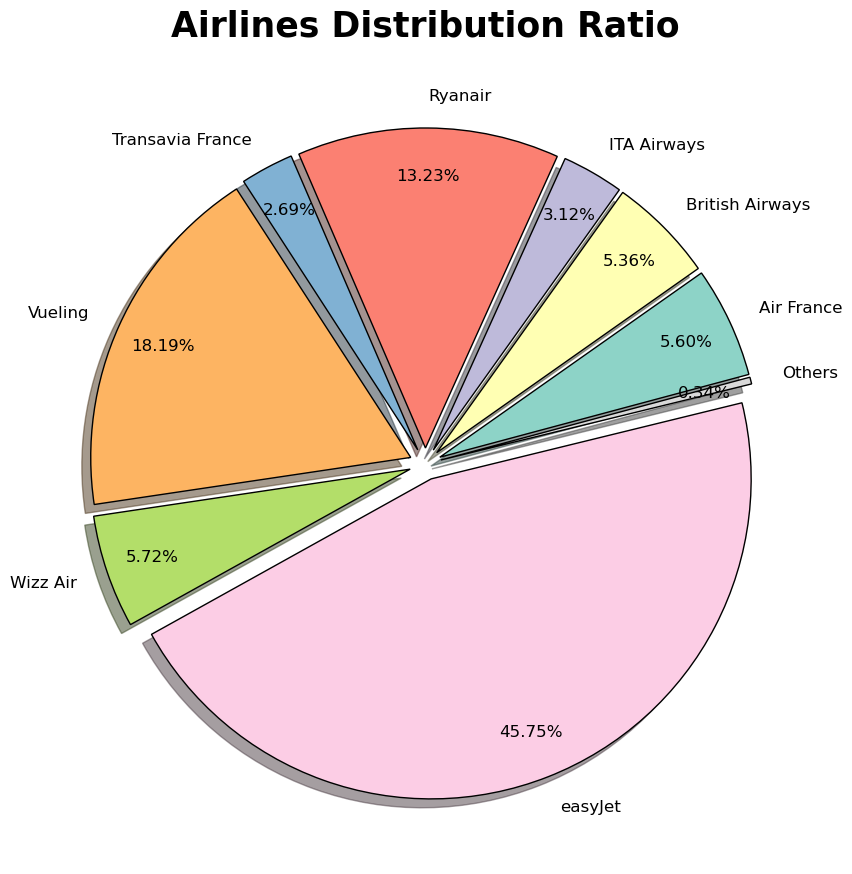

In [132]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

airlines = grouped['Airline']
count = grouped['Count']

plt.title('Airlines Distribution Ratio', fontsize=25, fontweight='bold', pad=20)

# Define the explode parameter with smaller values to prevent slices from going out of the circle
explode = [0.05] * len(airlines)  # All explode values are set to smaller values

ax.pie(count, labels=airlines, autopct='%1.2f%%', shadow=True, startangle=15,
       explode=explode, textprops={'fontsize': 12},
       colors=sns.color_palette('Set3', 9), wedgeprops={'edgecolor': 'black'},
       pctdistance=0.85, labeldistance=1.1, center=(0.5, 0.5))

plt.show()


In [133]:
df_filtered = pd.get_dummies(df_filtered, columns=['Site'])

## 🔎**Seeking and Determining Pricing Policies**
___


In [134]:
# checking the correlation between the features and the price:
corr_test_df = df_filtered.copy()
corr_test_df.drop('Airline', axis=1, inplace=True)
correlation = corr_test_df.corr()
print(correlation['Price(NIS)'])

TTT                                  0.001053
LOS                                  0.011403
Onward Flight Connections            0.034550
Onward Connection Duration(min)      0.000316
Return Flight Connections            0.033529
Return Connection Duration(min)      0.000623
Carry-ons                            0.312489
Checked Bags                         0.067176
Price(NIS)                           1.000000
Total Onward Flight Duration(min)    0.456915
Total Return Flight Duration(min)    0.443748
Departure Month                      0.146878
Departure Day                       -0.207310
Departure Weekday                    0.018276
Return Month                         0.086986
Return Day                          -0.130392
Return Weekday                      -0.030577
Departure Time Category Num          0.025475
Return Time Category Num            -0.009169
Is Weekend Flight                    0.045397
Onward Departure Airport Distance   -0.137924
Onward Arrival Airport Distance   

### 👀 **Features to keep an eye on:**
- `Total Onward Flight Duration(min)`
- `Total Return Flight Duration(min)`
- `Carry-ons`

<Figure size 1200x800 with 0 Axes>

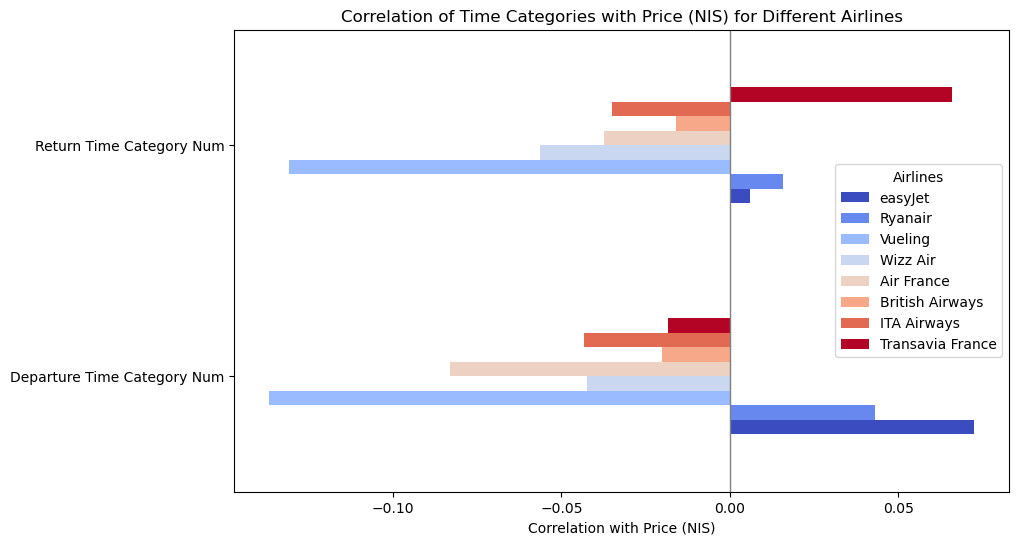

In [135]:
# checking specificaly if the time categories have any correlation with the price
time_category_feats = ['Departure Time Category Num', 'Return Time Category Num']

# Function to calculate correlation for a specific airline with specific features
def calculate_correlation(airline, features):
    df_airline = corr_test_df[df_filtered['Airline'] == airline]
    return df_airline[features].corrwith(df_airline['Price(NIS)'])

# Calculate the correlations for each airline and store them
airlines = ['easyJet', 'Ryanair', 'Vueling', 'Wizz Air', 'Air France', 'British Airways', 'ITA Airways', 'Transavia France']
correlations_dict = {}

for airline in airlines:
    correlations_dict[airline] = calculate_correlation(airline, time_category_feats)

# Convert the dictionary into a DataFrame for easy visualization
correlation_df = pd.DataFrame(correlations_dict)

# Plot the correlations for each feature
plt.figure(figsize=(12, 8))
correlation_df.plot(kind='barh', figsize=(10, 6), cmap='coolwarm')
plt.xlabel('Correlation with Price (NIS)')
plt.title('Correlation of Time Categories with Price (NIS) for Different Airlines')
plt.axvline(0, color='gray', linewidth=1)  # Highlight 0 correlation line
plt.legend(title='Airlines')
plt.show()

#### ❌ The correlation for these features are very low (|corr| ~ 1.5 at max),   so the pricing policy isn't too affected by the times of the flights.

In [136]:
#checking the correlation between the features and the price for each airline to decide pricing policies:
easyJet = corr_test_df[df_filtered['Airline'] == 'easyJet']
ryanair = corr_test_df[df_filtered['Airline'] == 'Ryanair']
vueling = corr_test_df[df_filtered['Airline'] == 'Vueling']
wizzAir = corr_test_df[df_filtered['Airline'] == 'Wizz Air']
airFrance = corr_test_df[df_filtered['Airline'] == 'Air France']
britishAirways = corr_test_df[df_filtered['Airline'] == 'British Airways']
itaAirways = corr_test_df[df_filtered['Airline'] == 'ITA Airways']
transavia = corr_test_df[df_filtered['Airline'] == 'Transavia France']
easyJet

,TTT,LOS,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Total Onward Flight Duration(min),...,Return Time Category Num,Is Weekend Flight,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min),Site_Kayak,Site_Momondo
2,1,1,0,0,0,0,0,0,637,70,...,2,True,64,25,25,45,0,135,True,False
5,1,1,0,0,0,0,0,0,612,70,...,2,True,64,25,25,56,0,145,True,False
6,1,1,0,0,0,0,0,0,612,70,...,2,True,64,25,25,56,0,145,True,False
8,1,1,0,0,0,0,0,0,637,70,...,1,True,64,25,25,45,0,140,True,False
9,1,1,0,0,0,0,0,0,637,70,...,1,True,64,25,25,45,0,140,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527157,16,3,0,0,0,0,0,0,651,130,...,2,False,32,13,13,32,0,250,True,False
527172,16,3,0,0,0,0,0,0,677,125,...,1,False,32,13,13,32,0,245,True,False
527193,16,3,0,0,0,0,0,0,706,130,...,1,False,32,13,13,32,0,250,True,False
527196,16,3,0,0,0,0,0,0,704,125,...,2,False,32,13,13,32,0,245,True,False


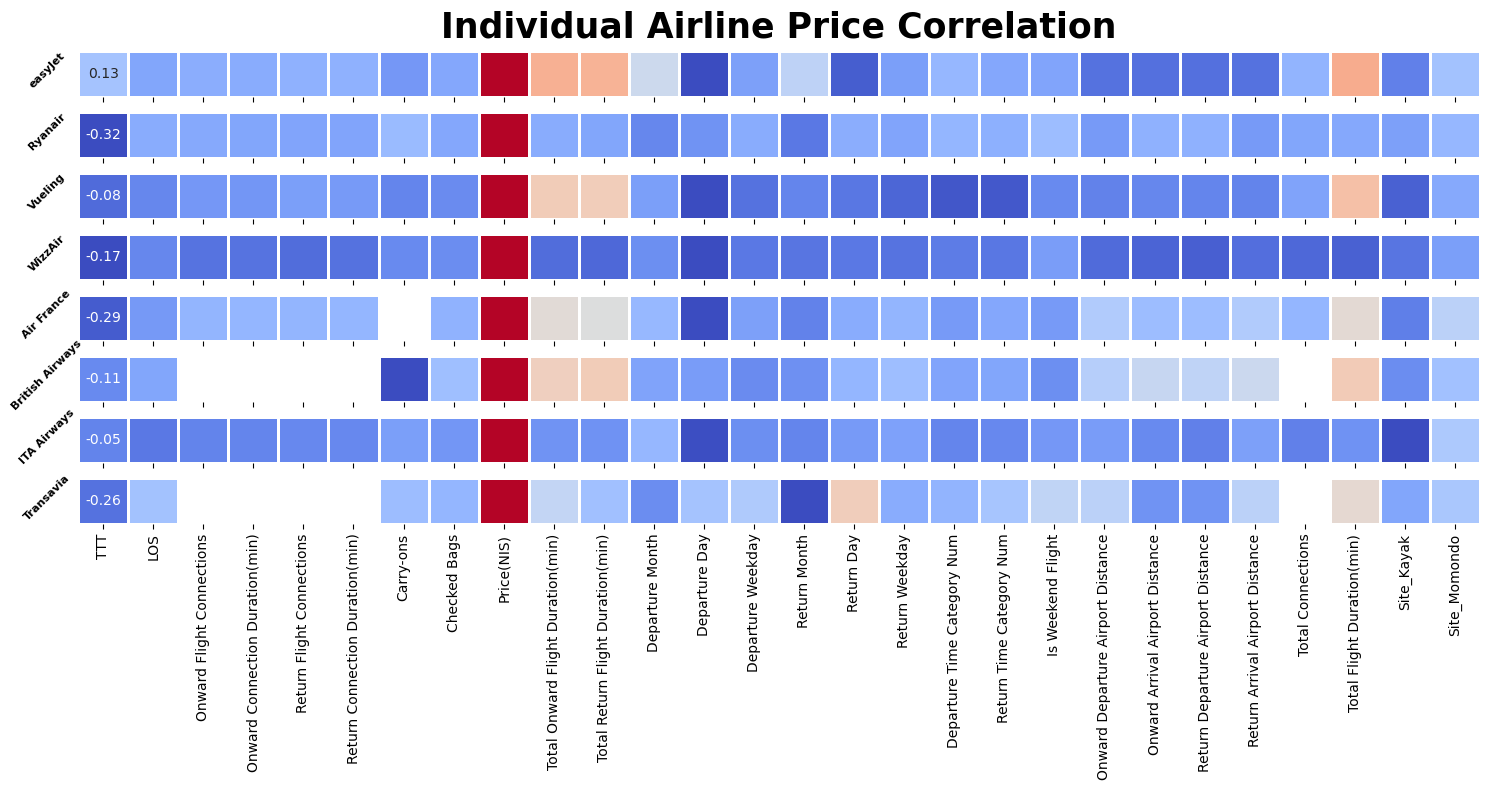

In [137]:
# List of airlines and their DataFrames
airlines = [
    ("easyJet", easyJet),
    ("Ryanair", ryanair),
    ("Vueling", vueling),
    ("WizzAir", wizzAir),
    ("Air France", airFrance),
    ("British Airways", britishAirways),
    ("ITA Airways", itaAirways),
    ("Transavia", transavia)
]

# Create subplots
fig, axes = plt.subplots(len(airlines), 1, figsize=(15, 8), sharex=True)  # Share x-axis for alignment

# Loop through airlines and plot each heatmap
for i, (name, df) in enumerate(airlines):
    sns.heatmap(df.corr()[['Price(NIS)']].T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2, ax=axes[i], cbar=False)

    # Set title for the first plot
    if i == 0:
        axes[i].set_title('Individual Airline Price Correlation', fontsize=25, fontweight='bold', pad=10)

    # Customize y-axis labels
    axes[i].set_ylabel(name, fontsize=8, fontweight='bold', labelpad=20, rotation=45)

    # Remove x-axis ticks and labels for all except the last subplot
    if i < len(airlines) - 1:
        axes[i].set_xticklabels([])

    # Remove y-axis ticks and labels for all plots
    axes[i].set_yticks([])
    axes[i].set_yticklabels([])

plt.tight_layout()
plt.show()

### 👀 **Metrics to consider following individual correlation check:**
- `Total Onward Flight Duration`
- `Total Return Flight Duration`
- `TTT`
- `Carry-ons`
- `Departure Day`
- `Return Month`
- `Return Day`

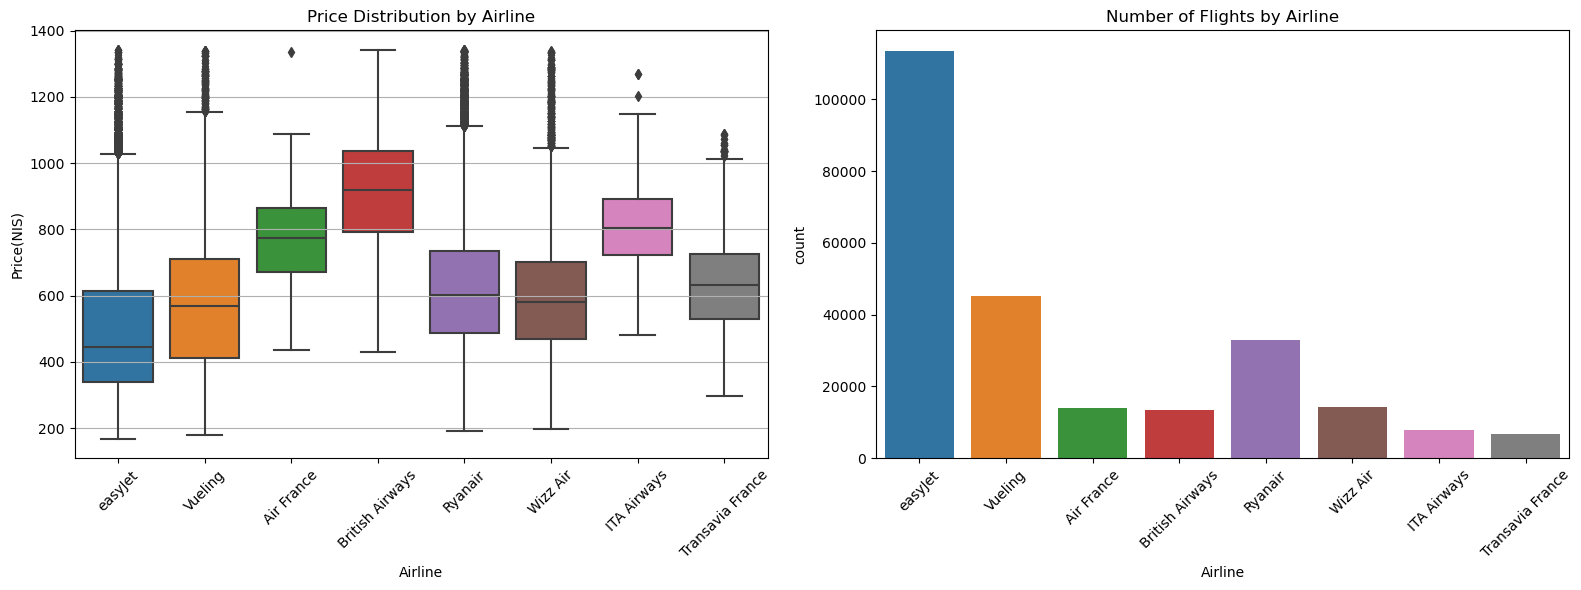

In [138]:
# Checking the distribution of the price and the number of flights by airline
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot price distribution by airline (box plot)
sns.boxplot(data=df_filtered, x='Airline', y='Price(NIS)', ax=axes[0])
axes[0].set_title('Price Distribution by Airline')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, axis='y')

# Plot number of flights by airline (count plot)
sns.countplot(data=df_filtered, x='Airline', ax=axes[1])
axes[1].set_title('Number of Flights by Airline')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 💡A possible policy could involve the frequeny and availabilty of flights:
- The more flights availabe, the cheaper the price for each flight.

### 💡Personal Insight - We should also check how each airline opperates:
- **Average price**
- **Price variance/std-v**

# 💲Policy Aggregation
__________________________________________________________________________
#### Following different correlation checks and personal insights, we will consider each feature of the aggregation as a possible pricing policy:

In [139]:
# These are the main features that we beleive dictate the pricing policy of different airlines:
df_cluster = df_filtered.groupby('Airline').agg(
    avgOnwardFlightDurationMin = ('Total Onward Flight Duration(min)', 'mean'),
    avgReturnFlightDurationMin= ('Total Return Flight Duration(min)', 'mean'),
    medTTT = ('TTT', 'median'),
    avgCarryOns = ('Carry-ons', 'mean'),
    medDepDay = ('Departure Day', 'median'),
    medRetDay = ('Return Day', 'median'),
    medRetMonth = ('Return Month', 'median'),
    avgPrice = ('Price(NIS)', 'mean'),
    priceStd = ('Price(NIS)', 'std'),
    flightsCount = ('Price(NIS)', 'count')
)
df_cluster

,avgOnwardFlightDurationMin,avgReturnFlightDurationMin,medTTT,avgCarryOns,medDepDay,medRetDay,medRetMonth,avgPrice,priceStd,flightsCount
Airline,,,,,,,,,,
Air France,126.578853,125.699633,10.0,1.000000,15.0,16.0,3.0,771.060678,124.087927,13893
British Airways,153.890518,153.465298,24.0,0.723062,8.0,8.0,4.0,916.178209,174.890974,13299
ITA Airways,133.391911,132.570099,13.0,0.998191,18.0,19.0,3.0,807.879700,118.289331,7739
Ryanair,155.192198,154.525216,16.0,0.191436,18.0,18.0,3.0,629.867067,204.541292,32836
Transavia France,128.179568,128.608611,23.0,0.986049,10.0,9.0,4.0,631.754125,142.682916,6666
Vueling,112.110609,112.764781,14.0,0.003301,17.0,17.0,3.0,569.600939,195.036465,45141
Wizz Air,156.915658,158.256477,15.0,0.007392,18.0,18.0,3.0,598.990214,182.143456,14204
easyJet,89.087406,89.344127,15.0,0.080799,17.0,17.0,3.0,486.527042,187.864631,113528


In [140]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.524754
avgReturnFlightDurationMin    0.504793
medTTT                        0.233812
avgCarryOns                   0.705742
medDepDay                    -0.516458
medRetDay                    -0.413481
medRetMonth                   0.423419
avgPrice                      1.000000
priceStd                     -0.525538
flightsCount                 -0.665995
Name: avgPrice, dtype: float64

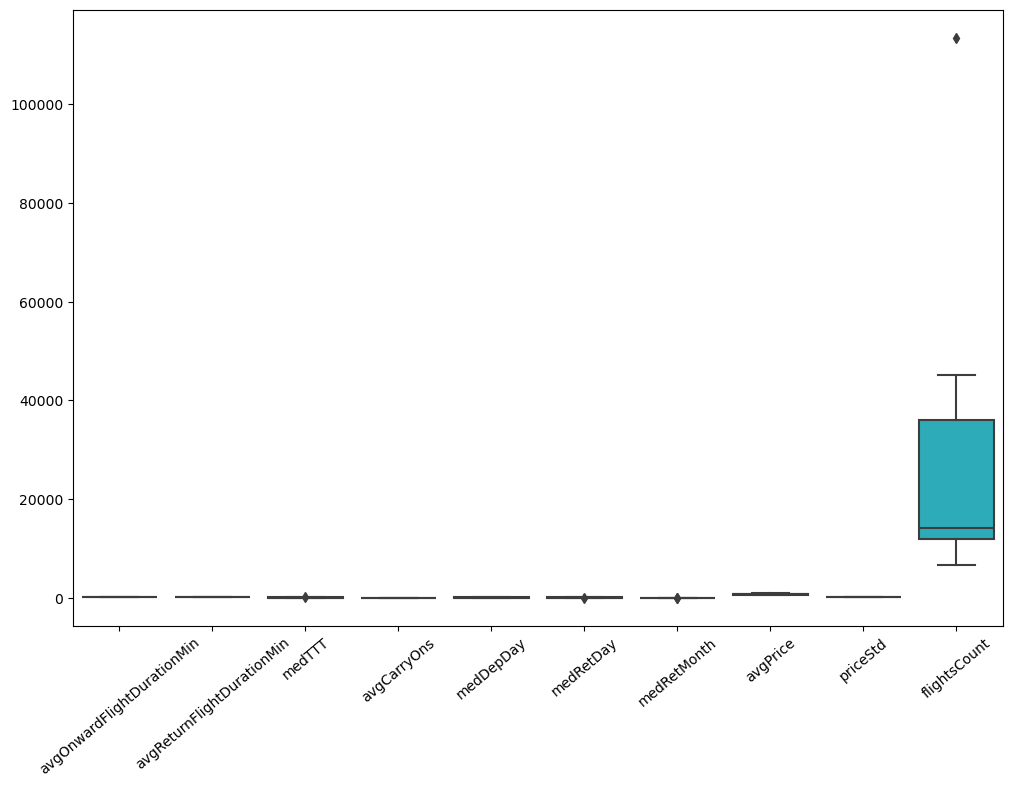

In [141]:
# checking distibutions and looking for outliers
plt.figure(figsize=(12,8))
sns.boxplot(df_cluster)
plt.xticks(rotation=40)
plt.show()

#### ⚖ We should scale our data for even weights:

In [142]:
# scaling the data to Z (mean = 0, std = 1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

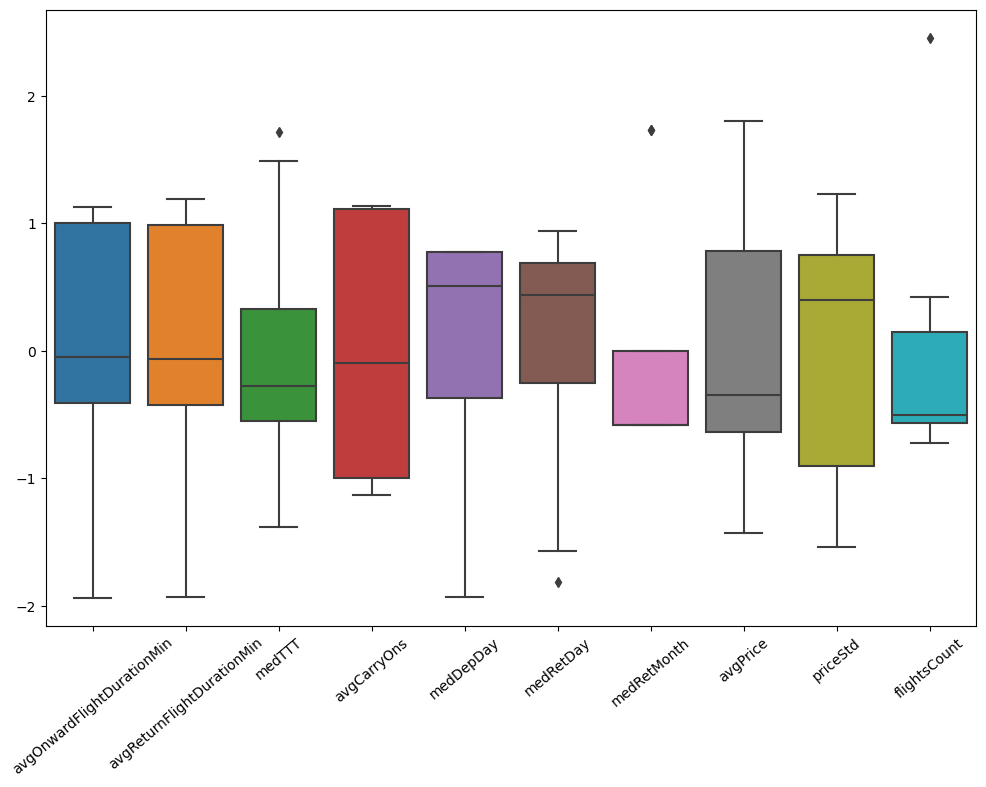

In [143]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_scaled)
plt.xticks(ticks=range(len(df_cluster.columns)), labels=df_cluster.columns, rotation=40)
plt.show()

In [144]:
outliers = []
for feature in df_cluster.columns:
    Q1 = np.percentile(df_cluster[feature],25)
    Q3 = np.percentile(df_cluster[feature],75)
    step = (Q3-Q1)*1.5
    outliers_pts = df_cluster[~((df_cluster[feature]>=Q1-step) & (df_cluster[feature]<=Q3+step))]
    outliers.extend(outliers_pts.index)

    print('Airlines considered outliers for the feature %s are:' %feature)
    print(outliers_pts.index)
    print()

Airlines considered outliers for the feature avgOnwardFlightDurationMin are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature avgReturnFlightDurationMin are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature medTTT are:
Index(['British Airways'], dtype='object', name='Airline')

Airlines considered outliers for the feature avgCarryOns are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature medDepDay are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature medRetDay are:
Index(['British Airways'], dtype='object', name='Airline')

Airlines considered outliers for the feature medRetMonth are:
Index(['British Airways', 'Transavia France'], dtype='object', name='Airline')

Airlines considered outliers for the feature avgPrice are:
Index([], dtype='object', name='Airline')

Airlines considered outliers for the feature priceStd are:
Index([], dt

### 💡Insights:
- There is a clear indication that British Airways may have a different policy to others in different fields. 
- Transavia France and easyJet may have a different pricing policy for median return month and total number of flights.

We will look into this later.

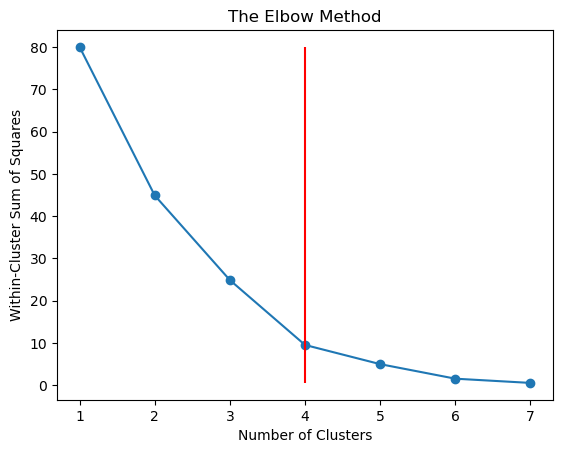

In [145]:
# checking the elbow method to determine the best number of k's for clustering
wcss = []
for i in range(1,8):
    kmeans2 = KMeans(n_clusters=i, n_init=10).fit(df_scaled)
    wcss.append(kmeans2.inertia_)

k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

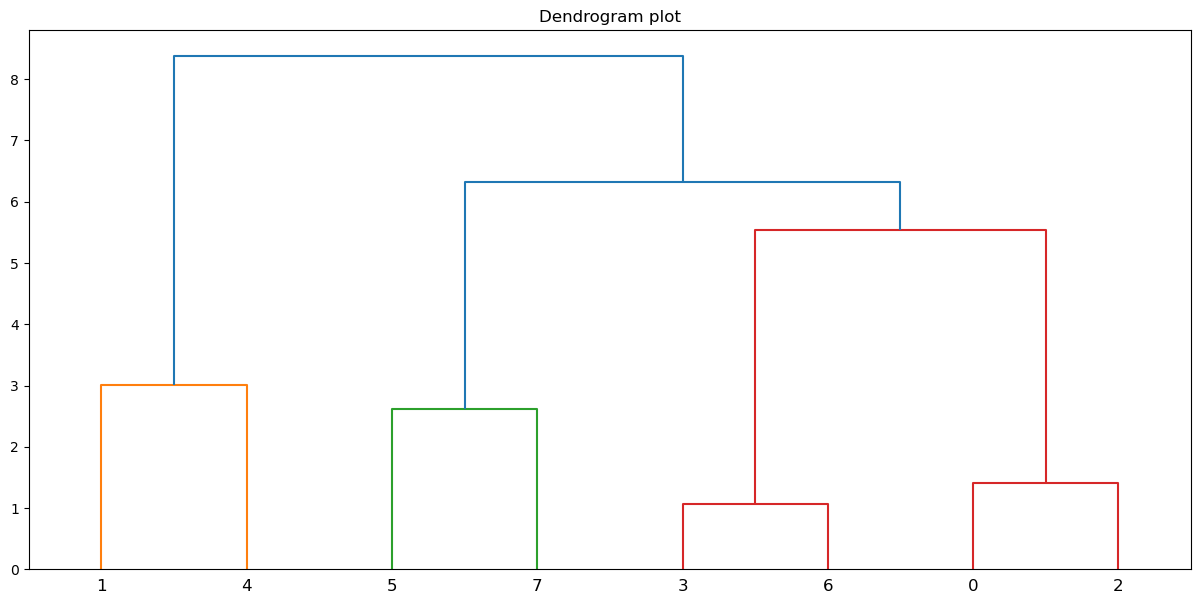

In [146]:
# checking the dendrogram to see how the clusters merge (rule of thumb - go to the longest branch from the top and go up a bit until there is a clear slice of the tree)
plt.figure(figsize=(15,7))
dendrogram2=sch.dendrogram(sch.linkage(df_scaled,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

In [147]:
# checking silhouette score to see how well seperated the clusters are from each other and also how similar points, within a cluster, are:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.3605852649695394
3 clusters silhouette score is 0.3543449657350541
4 clusters silhouette score is 0.5224117147828233
5 clusters silhouette score is 0.4213016102627383
6 clusters silhouette score is 0.32024266783320476
7 clusters silhouette score is 0.16063007673441382


_______________
# **clustering**

In [148]:
X = df_scaled
labels = df_cluster.index

num_of_clusters = 4

kmeans = KMeans(n_clusters=num_of_clusters, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# dimension reduction
pca = PCA(n_components=2)
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.50447415, 0.24002186])

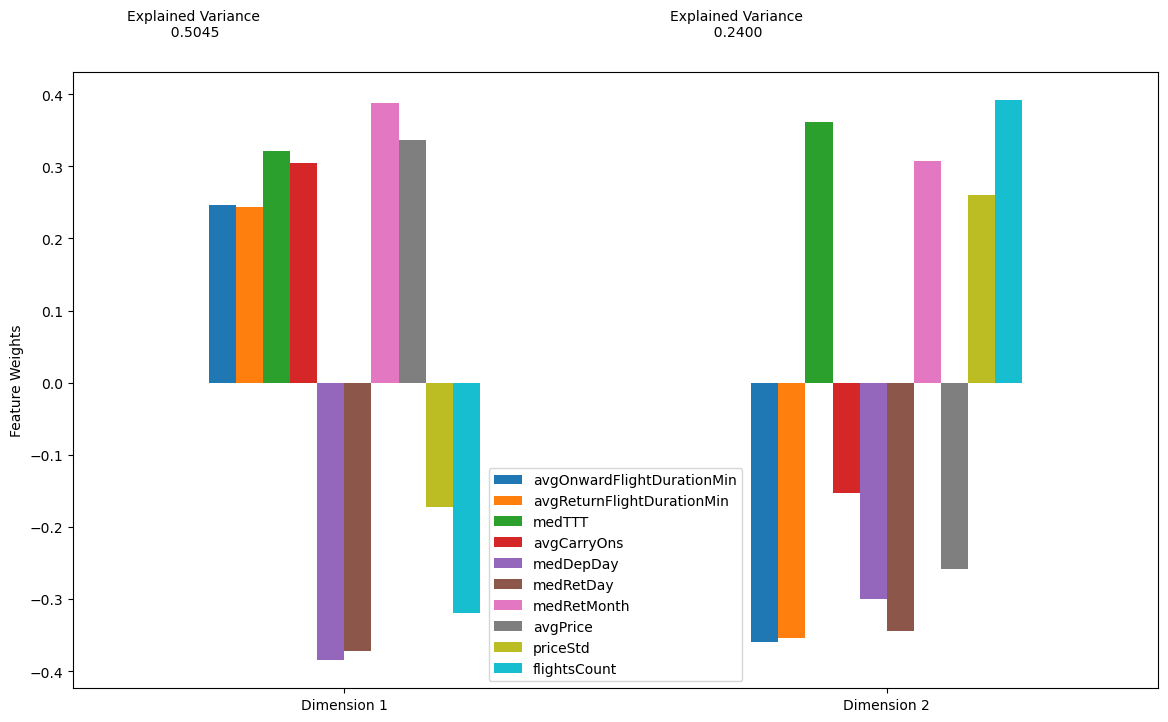

In [149]:
# seeing the weight of each feature in each dimension
df_scaled_df = pd.DataFrame(df_scaled, columns=df_cluster.columns)
pca_results = vs.pca_results(df_scaled_df,pca)

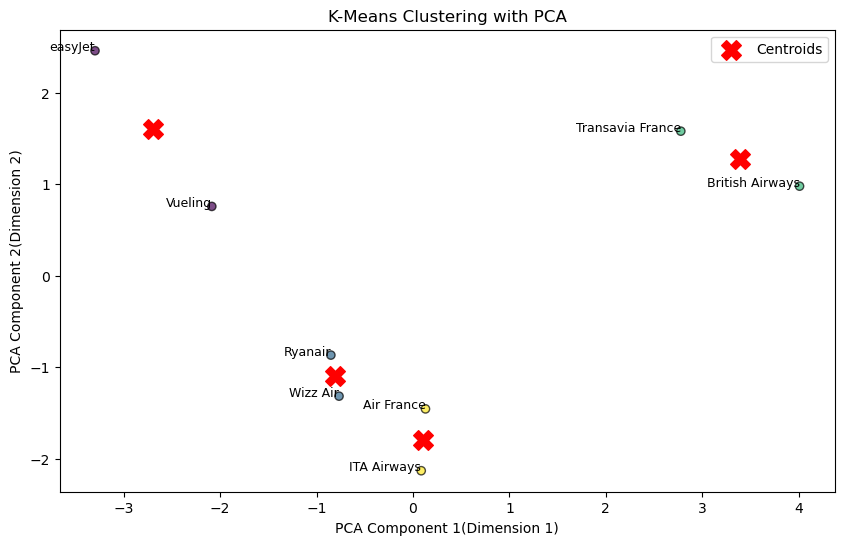

In [150]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', alpha=0.7)

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels to each data point
for i, txt in enumerate(labels):
    ax.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='right', color='black')

# Labels and title
ax.set_title("K-Means Clustering with PCA")
ax.set_xlabel("PCA Component 1(Dimension 1)")
ax.set_ylabel("PCA Component 2(Dimension 2)")
ax.legend()

plt.show()

### 💡Insights:
- It is difficult to understand the relationships due to the dimension reduction, so we will break it down into different categories to try to understand them.
- However we can see in general the airlines that opperate with similar pricing policies.

### 📊 Average Price vs Number of Flights:

In [151]:
df_cluster.iloc[:, [7,9]]

,avgPrice,flightsCount
Airline,,
Air France,771.060678,13893
British Airways,916.178209,13299
ITA Airways,807.879700,7739
Ryanair,629.867067,32836
Transavia France,631.754125,6666
Vueling,569.600939,45141
Wizz Air,598.990214,14204
easyJet,486.527042,113528


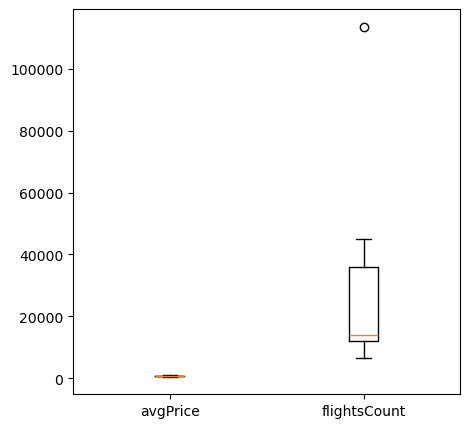

In [152]:
# taking only the neccessary columns and checking if scaling is needed
flight_count_data = df_cluster.iloc[:, [7,9]]
plt.figure(figsize=(5,5))
display_data = [flight_count_data['avgPrice'],flight_count_data['flightsCount']]
plt.boxplot(display_data)
plt.xticks(range(1,3),flight_count_data.keys())
plt.show()

In [153]:
# we scale because the features are in different scales from one another
flight_count_data_scaled = scaler.fit_transform(flight_count_data)

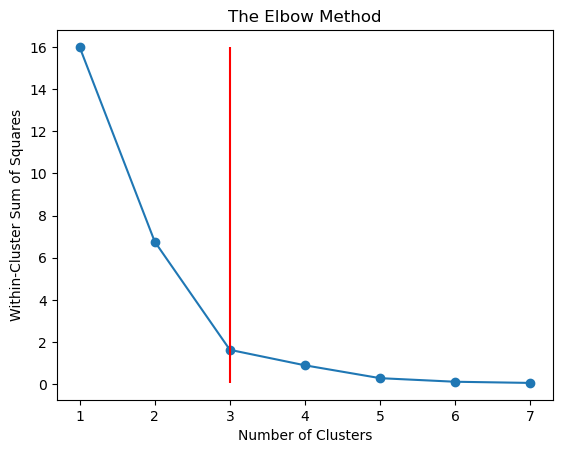

In [154]:
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_count_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [155]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_count_data_scaled)
    score = silhouette_score(flight_count_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.5033796877410284
3 clusters silhouette score is 0.500792600142933
4 clusters silhouette score is 0.4292405573634911
5 clusters silhouette score is 0.39458884412433914
6 clusters silhouette score is 0.2892710626034314
7 clusters silhouette score is 0.16127868239815235


In [156]:
X = flight_count_data_scaled
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

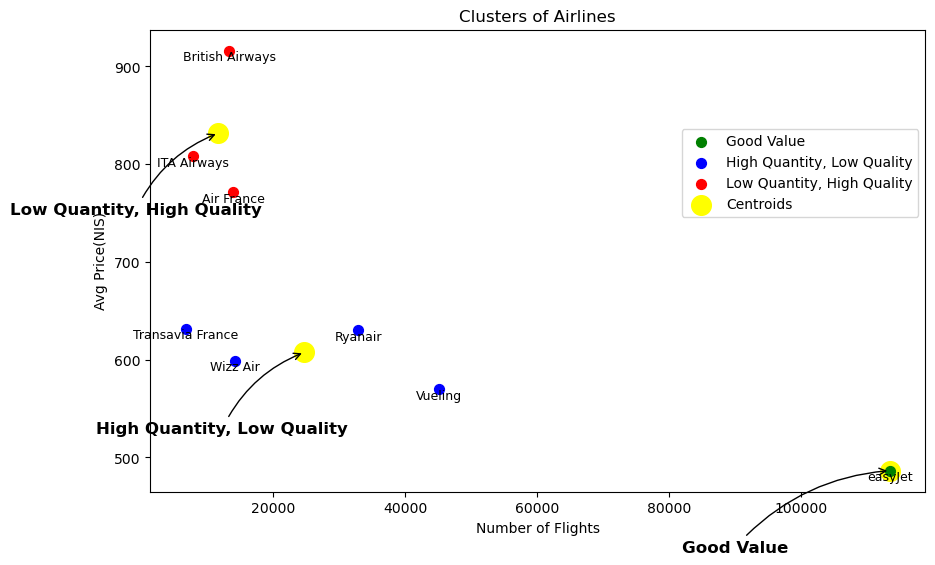

In [157]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Good Value', 'High Quantity, Low Quality', 'Low Quantity, High Quality']
plt.scatter(X[y_kmeans == 0,1], X[y_kmeans == 0,0], s = 50, c = 'green', label= 'Good Value',zorder=3)
plt.scatter(X[y_kmeans == 1,1], X[y_kmeans == 1,0], s = 50, c = 'blue', label= 'High Quantity, Low Quality',zorder=3)
plt.scatter(X[y_kmeans == 2,1], X[y_kmeans == 2,0], s = 50, c = 'red', label= 'Low Quantity, High Quality',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 1], kmeans.cluster_centers_[: ,0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Number of Flights')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_count_data.index):
    plt.text(X[i, 1], X[i, 0], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]):
    plt.annotate(label, xy=(x,y), xytext=(-150,-50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [158]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.524754
avgReturnFlightDurationMin    0.504793
medTTT                        0.233812
avgCarryOns                   0.705742
medDepDay                    -0.516458
medRetDay                    -0.413481
medRetMonth                   0.423419
avgPrice                      1.000000
priceStd                     -0.525538
flightsCount                 -0.665995
Name: avgPrice, dtype: float64

### 💡Insights:
- The correlation between the avg price and the number of flights indicates a relatively strong negative connection.

As seen earlier, easyJet was considered an outlier due to the high number of flights. now we can also see that their avg price is the lowest, indicating that
their policy could be to offer cheap flights but at a large volume, it is very different to the first cluster policy who we can infer offer higher quality / more luxerious
flights due to their price being higher and lower frequency of flights.
___

### 📊 Average Price vs Price Standard Deviation:

In [159]:
df_cluster.iloc[:, [7,8]]

,avgPrice,priceStd
Airline,,
Air France,771.060678,124.087927
British Airways,916.178209,174.890974
ITA Airways,807.879700,118.289331
Ryanair,629.867067,204.541292
Transavia France,631.754125,142.682916
Vueling,569.600939,195.036465
Wizz Air,598.990214,182.143456
easyJet,486.527042,187.864631


In [ ]:
flight_priceSTD_data = df_cluster.iloc[:, [7,8]]
flight_priceSTD_data_scaled = scaler.fit_transform(flight_priceSTD_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_priceSTD_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [ ]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_priceSTD_data_scaled)
    score = silhouette_score(flight_priceSTD_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.5193679129483337
3 clusters silhouette score is 0.5099669870475583
4 clusters silhouette score is 0.46557109350284087
5 clusters silhouette score is 0.31159485650738517
6 clusters silhouette score is 0.2532370492149813
7 clusters silhouette score is 0.1882984868429986


In [ ]:
X = flight_priceSTD_data_scaled
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

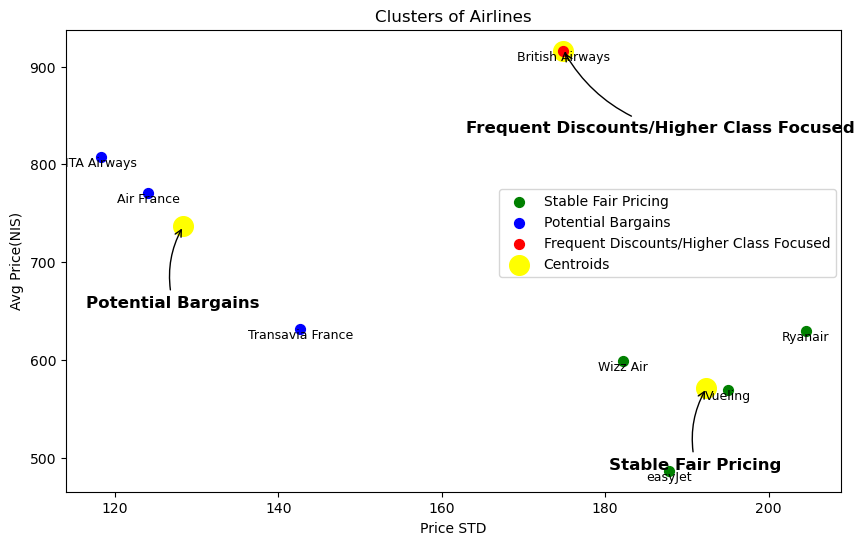

In [ ]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Stable Fair Pricing', 'Potential Bargains', 'Frequent Discounts/Higher Class Focused']
plt.scatter(X[y_kmeans == 0,1], X[y_kmeans == 0,0], s = 50, c = 'green', label= 'Stable Fair Pricing',zorder=3)
plt.scatter(X[y_kmeans == 1,1], X[y_kmeans == 1,0], s = 50, c = 'blue', label= 'Potential Bargains',zorder=3)
plt.scatter(X[y_kmeans == 2,1], X[y_kmeans == 2,0], s = 50, c = 'red', label= 'Frequent Discounts/Higher Class Focused',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 1], kmeans.cluster_centers_[: ,0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Price STD')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_priceSTD_data.index):
    plt.text(X[i, 1], X[i, 0], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0]):
    plt.annotate(label, xy=(x,y), xytext=(-70,-50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[0.55,0.45])
plt.show()

## Bar Plot:

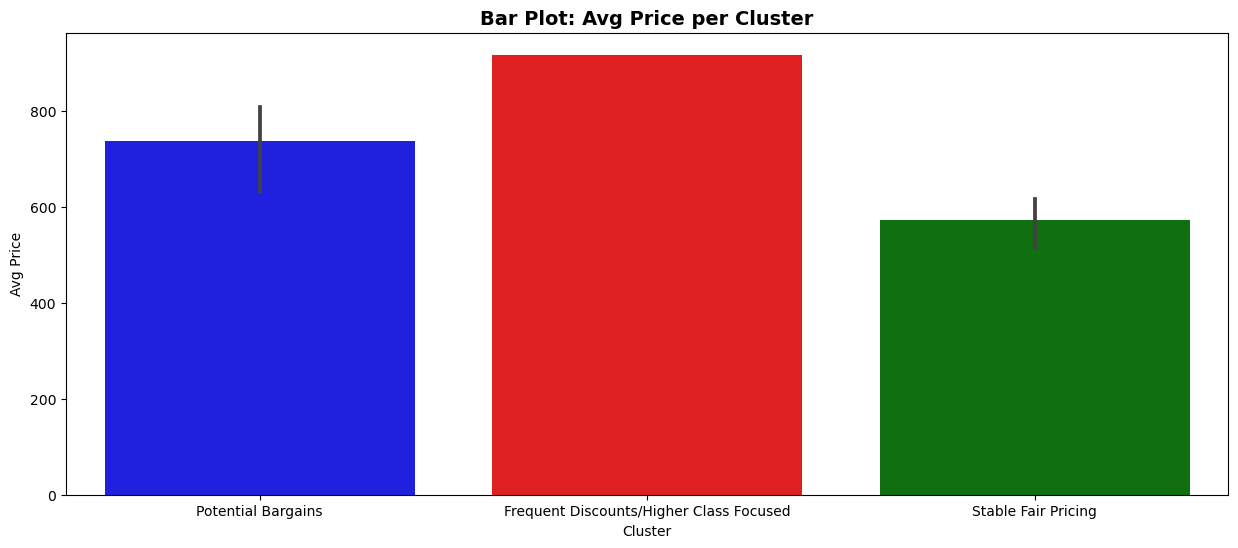

In [ ]:
df_clustered = pd.DataFrame(flight_priceSTD_data, columns=['priceStd', 'avgPrice'])
df_clustered['Cluster'] = y_kmeans  # Add cluster labels

cluster_names = {0: 'Stable Fair Pricing', 1: 'Potential Bargains', 2: 'Frequent Discounts/Higher Class Focused'}
df_clustered['Cluster'] = df_clustered['Cluster'].replace(cluster_names)
custom_palette = {'Stable Fair Pricing': 'green', 'Potential Bargains': 'blue', 'Frequent Discounts/Higher Class Focused': 'red'}

plt.figure(figsize=(15,6))
sns.barplot(data=df_clustered, x='Cluster', y='avgPrice', palette=custom_palette)

plt.title("Bar Plot: Avg Price per Cluster", fontsize=14, fontweight='bold')
plt.ylabel("Avg Price")
plt.show()

In [ ]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.524754
avgReturnFlightDurationMin    0.504793
medTTT                        0.233812
avgCarryOns                   0.705742
medDepDay                    -0.516458
medRetDay                    -0.413481
medRetMonth                   0.423419
avgPrice                      1.000000
priceStd                     -0.525538
flightsCount                 -0.665995
Name: avgPrice, dtype: float64

### 💡Insights:
- We can clearly see the different strategies the airlines have when it comes to varrying the prices.
- However the price is only partially related to its own deviation so the labels are not very accurate.
___

### 📊 Average Price vs Average Flight Duration:
❗Note: We will use both onward flight duration and return flight duration to measure the overall duration because the price is for BOTH directions

In [ ]:
df_cluster.iloc[:, [0,1,7]]

,avgOnwardFlightDurationMin,avgReturnFlightDurationMin,avgPrice
Airline,,,
Air France,126.578853,125.699633,771.060678
British Airways,153.890518,153.465298,916.178209
ITA Airways,133.391911,132.570099,807.879700
Ryanair,155.192198,154.525216,629.867067
Transavia France,128.179568,128.608611,631.754125
Vueling,112.110609,112.764781,569.600939
Wizz Air,156.915658,158.256477,598.990214
easyJet,89.087406,89.344127,486.527042


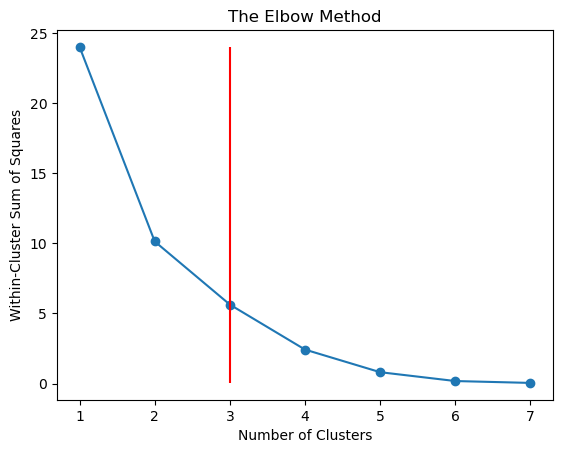

In [ ]:
flight_duration_data = df_cluster.iloc[:, [0,1,7]]
flight_duration_data_scaled = scaler.fit_transform(flight_duration_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_duration_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [ ]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_duration_data_scaled)
    score = silhouette_score(flight_duration_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.424863397446297
3 clusters silhouette score is 0.448501808812548
4 clusters silhouette score is 0.4496567388082729
5 clusters silhouette score is 0.4245962547627553
6 clusters silhouette score is 0.3494363284486568
7 clusters silhouette score is 0.2082805927887122


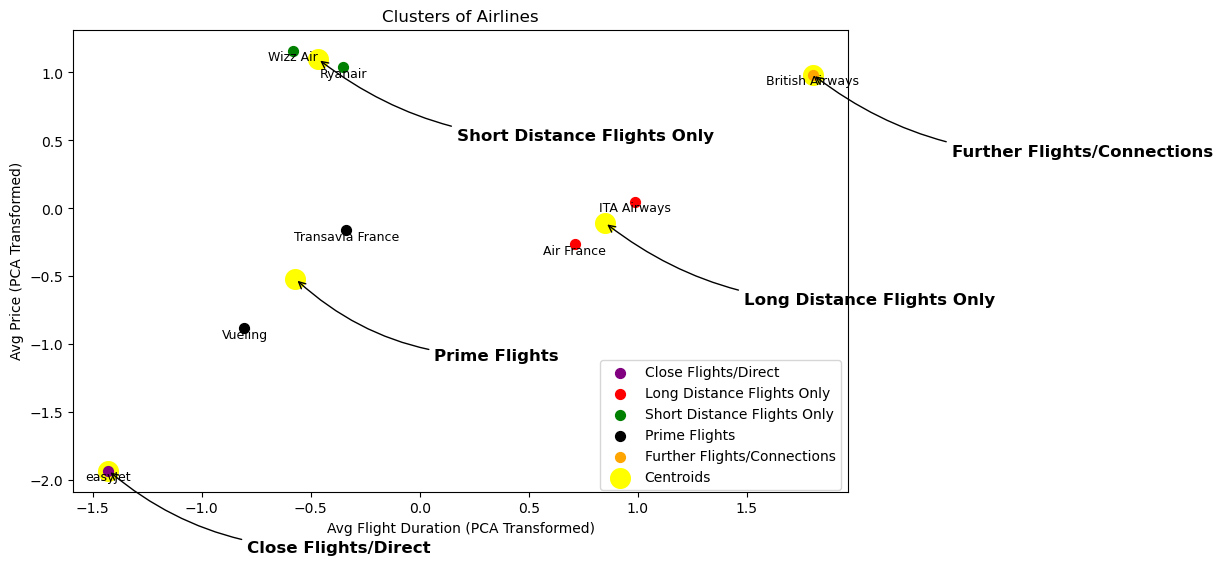

In [ ]:
# manual PCA:
PC1 = 0.5 * flight_duration_data_scaled[:, 0] + 0.5 * flight_duration_data_scaled[:, 1]  # 50% of Onward Duration and 50% of Return Duration
PC2 = flight_duration_data_scaled[:, 2]  # 100% of Price

custom_pca = np.vstack([PC1, PC2]).T  # Stack the two components

custom_pca_df = pd.DataFrame(custom_pca, columns=['PC1', 'PC2'])

# k-means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(custom_pca)


# Scatter plot for the clusters
plt.figure(figsize=(10,6))
labels = ['Close Flights/Direct', 'Long Distance Flights Only', 'Short Distance Flights Only', 'Prime Flights', 'Further Flights/Connections']

plt.scatter(custom_pca_df.iloc[y_kmeans == 0, 1], custom_pca_df.iloc[y_kmeans == 0, 0], s=50, c='purple', label='Close Flights/Direct', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 1, 1], custom_pca_df.iloc[y_kmeans == 1, 0], s=50, c='red', label='Long Distance Flights Only', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 2, 1], custom_pca_df.iloc[y_kmeans == 2, 0], s=50, c='green', label='Short Distance Flights Only', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 3, 1], custom_pca_df.iloc[y_kmeans == 3, 0], s=50, c='black', label='Prime Flights', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 4, 1], custom_pca_df.iloc[y_kmeans == 4, 0], s=50, c='orange', label='Further Flights/Connections', zorder=3)

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg Flight Duration (PCA Transformed)')
plt.ylabel('Avg Price (PCA Transformed)')

# Annotate the points with their labels
for i, txt in enumerate(flight_duration_data.index):
    plt.text(custom_pca_df.iloc[i,1], custom_pca_df.iloc[i,0], txt, fontsize=9, ha='center', va='top', color='black')

# Annotate the centroids
for label, x, y in zip(labels, kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0]):
    plt.annotate(label, xy=(x, y), xytext=(100, -50), 
                 va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[1, 0.3])
plt.show()

In [ ]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.524754
avgReturnFlightDurationMin    0.504793
medTTT                        0.233812
avgCarryOns                   0.705742
medDepDay                    -0.516458
medRetDay                    -0.413481
medRetMonth                   0.423419
avgPrice                      1.000000
priceStd                     -0.525538
flightsCount                 -0.665995
Name: avgPrice, dtype: float64

### 💡Insights:
- From the graph we can sense a certain trend where the longer the flight duration the higher the price.
- However we understand that if the flight duration is the same, but the price is different (purple vs black clusters) some other factor must play a part.
- We can rule out the flight times playing a major role in this because earlier we saw that the flight times didn't really correlate with the price.
- These "outliers" are probably premium flights offering something that the others don't such as included carry-ons or other things that we will now check.
- Ofcourse because the correlation is not so high these are only partially true conclusions.
- Another issue to take into consideration is the fact that not all these airlines operate the same routes of flights, thus changing the average flight duration.
___

### 📊 Average Price vs Average Included Carry-Ons

In [ ]:
df_cluster.iloc[:, [3,7]]

,avgCarryOns,avgPrice
Airline,,
Air France,1.000000,771.060678
British Airways,0.723062,916.178209
ITA Airways,0.998191,807.879700
Ryanair,0.191436,629.867067
Transavia France,0.986049,631.754125
Vueling,0.003301,569.600939
Wizz Air,0.007392,598.990214
easyJet,0.080799,486.527042


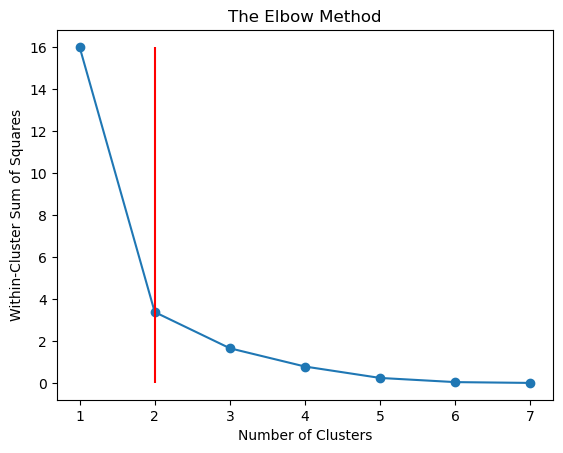

In [ ]:
# avg Carry-ons:
flight_carryOn_data = df_cluster.iloc[:, [3,7]]
flight_carryOn_data_scaled = scaler.fit_transform(flight_carryOn_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_carryOn_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [ ]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_carryOn_data_scaled)
    score = silhouette_score(flight_carryOn_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.6420297433006947
3 clusters silhouette score is 0.5034384566488024
4 clusters silhouette score is 0.529257669217448
5 clusters silhouette score is 0.3639781779171313
6 clusters silhouette score is 0.33116373759850776
7 clusters silhouette score is 0.1478891787816835


In [ ]:
X = flight_carryOn_data_scaled
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

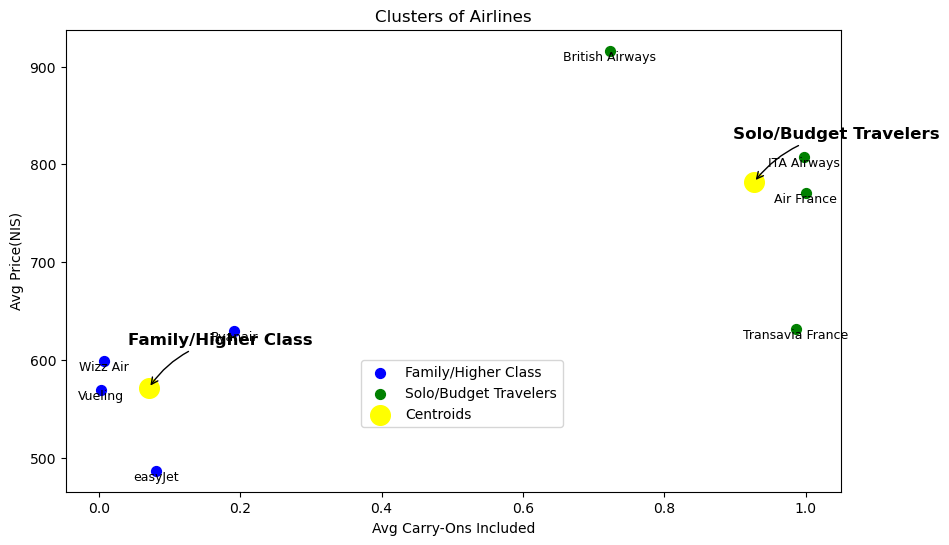

In [ ]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Family/Higher Class', 'Solo/Budget Travelers']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'blue', label= 'Family/Higher Class',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'green', label= 'Solo/Budget Travelers',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Avg Carry-Ons Included')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_carryOn_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-15,40), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[0.65,0.3])
plt.show()

## Box Plot:

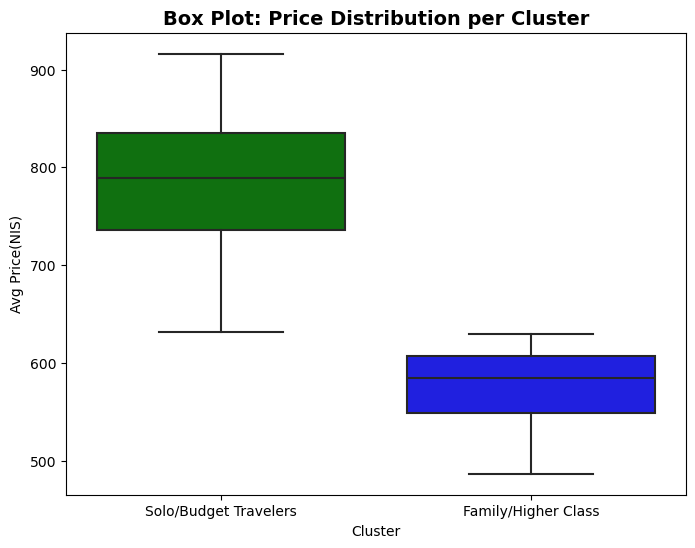

In [ ]:
df_clustered = pd.DataFrame(flight_carryOn_data, columns=['avgCarryOns', 'avgPrice'])
df_clustered['Cluster'] = y_kmeans  # Add cluster labels

cluster_names = {0: 'Family/Higher Class', 1: 'Solo/Budget Travelers'}
df_clustered['Cluster'] = df_clustered['Cluster'].replace(cluster_names)
custom_palette = {'Family/Higher Class': 'blue', 'Solo/Budget Travelers': 'green'}

plt.figure(figsize=(8,6))
sns.boxplot(data=df_clustered, x='Cluster', y='avgPrice', palette=custom_palette)
plt.title("Box Plot: Price Distribution per Cluster", fontsize=14, fontweight='bold')
plt.ylabel("Avg Price(NIS)")
plt.show()

In [ ]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.524754
avgReturnFlightDurationMin    0.504793
medTTT                        0.233812
avgCarryOns                   0.705742
medDepDay                    -0.516458
medRetDay                    -0.413481
medRetMonth                   0.423419
avgPrice                      1.000000
priceStd                     -0.525538
flightsCount                 -0.665995
Name: avgPrice, dtype: float64

### 💡Insights:
- Because of the high correlation, we know that included carry-ons effect the price heavily.
- We can use this to cluser airlines into marketing strategies such as type or traveler targeting.
- Solo travelers who are looking for cheap flights might not want to spend extra for a carry-on while families and higher class people
won't mind paying extra so that they can bring a carry-on.
- Maybe the airlines that don't offer included carry-ons also don't have to option to add carry-ons at all for those who do want to add, thus limiting the potential
customers and forcing to lower the price.
___

### 📊 Average Price vs Median Time To Travel

In [ ]:
df_cluster.iloc[:, [2,7]]

,medTTT,avgPrice
Airline,,
Air France,10.0,771.060678
British Airways,24.0,916.178209
ITA Airways,13.0,807.879700
Ryanair,16.0,629.867067
Transavia France,23.0,631.754125
Vueling,14.0,569.600939
Wizz Air,15.0,598.990214
easyJet,15.0,486.527042


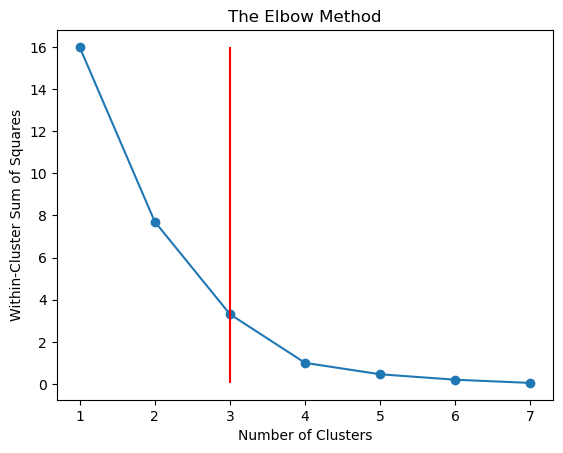

In [ ]:
# avg ttt
flight_ttt_data = df_cluster.iloc[:, [2,7]]
flight_ttt_data_scaled = scaler.fit_transform(flight_ttt_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_ttt_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [ ]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_ttt_data_scaled)
    score = silhouette_score(flight_ttt_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.42695671605826174
3 clusters silhouette score is 0.49735479865944726
4 clusters silhouette score is 0.4716286620570721
5 clusters silhouette score is 0.32787654901540275
6 clusters silhouette score is 0.18482107343629098
7 clusters silhouette score is 0.06640663655782605


In [ ]:
X = flight_ttt_data_scaled
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

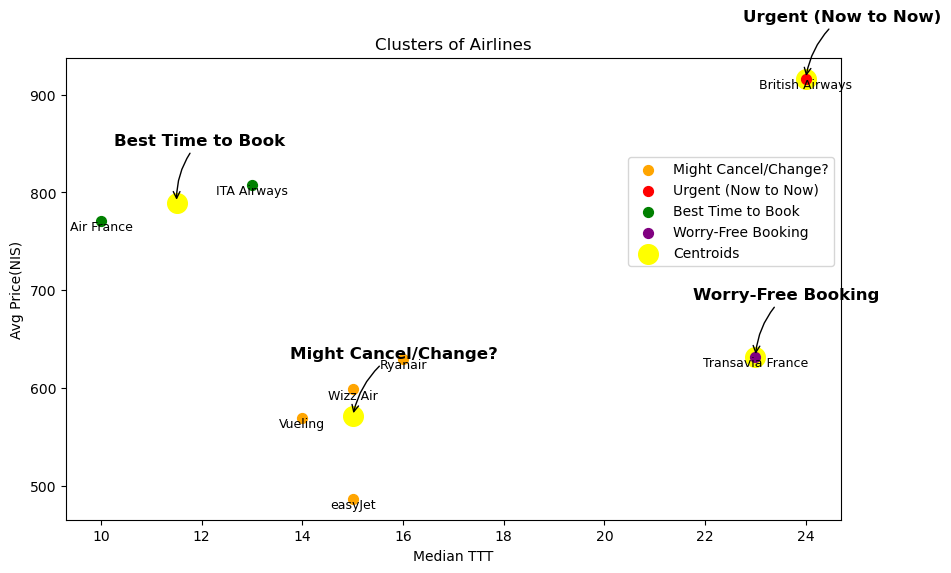

In [ ]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Might Cancel/Change?', 'Urgent (Now to Now)', 'Best Time to Book', 'Worry-Free Booking']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'orange', label= 'Might Cancel/Change?',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'red', label= 'Urgent (Now to Now)',zorder=3)
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 50, c = 'green', label= 'Best Time to Book',zorder=3)
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 50, c = 'purple', label= 'Worry-Free Booking',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Median TTT')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_ttt_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-45,50), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [ ]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.524754
avgReturnFlightDurationMin    0.504793
medTTT                        0.233812
avgCarryOns                   0.705742
medDepDay                    -0.516458
medRetDay                    -0.413481
medRetMonth                   0.423419
avgPrice                      1.000000
priceStd                     -0.525538
flightsCount                 -0.665995
Name: avgPrice, dtype: float64

### 💡Insights:
- The correlation makes it tricky to understand if the further you book in advance the cheaper the flight will be.
- The airlines that are higher priced probably provide insurances that the flight won't be cancelled or changed.
___

### 📊 Average Price vs Median Departure and Return Day of the Month

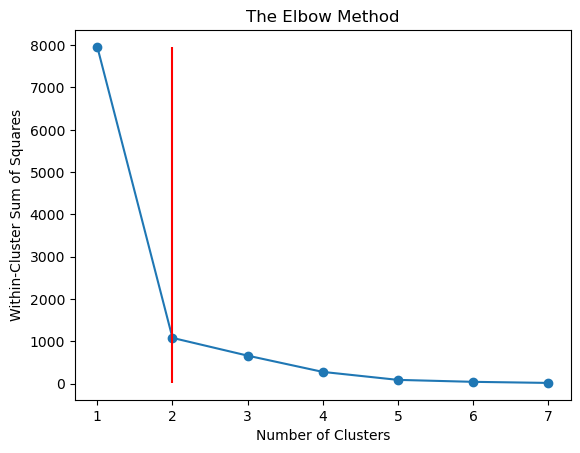

In [ ]:
flight_days_data = df_cluster.iloc[:, [4,5,8]]
flight_days_data_scaled = scaler.fit_transform(flight_days_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_days_data)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [ ]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_days_data_scaled)
    score = silhouette_score(flight_days_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.5645546061041884
3 clusters silhouette score is 0.6802998444425159
4 clusters silhouette score is 0.523626609526513
5 clusters silhouette score is 0.39048515886334395
6 clusters silhouette score is 0.1268683952394114
7 clusters silhouette score is 0.11985701403577904


<h4>❗<b>Note:</b> The elbow method clearly suggests using 2 clusters however the silhouette score indicates using 3.</h4>
<h4>❗We have tested both and decided that 3 clusters suit the seperation better.</h4>

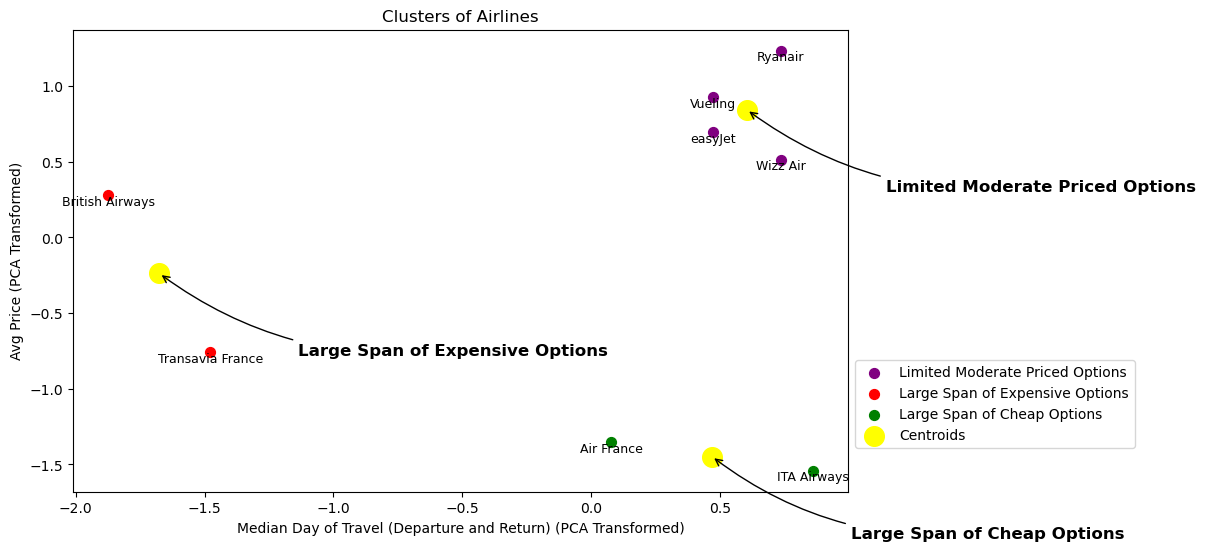

In [ ]:
# manual PCA:
PC1 = 0.5 * flight_days_data_scaled[:, 0] + 0.5 * flight_days_data_scaled[:, 1]  # 50% of Departure Dat and 50% of Return Day
PC2 = flight_days_data_scaled[:, 2]  # 100% of Price

custom_pca = np.vstack([PC1, PC2]).T  # Stack the two components

custom_pca_df = pd.DataFrame(custom_pca, columns=['PC1', 'PC2'])

# k-means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(custom_pca)


# Scatter plot for the clusters
plt.figure(figsize=(10,6))
labels = ['Limited Moderate Priced Options', 'Large Span of Expensive Options', 'Large Span of Cheap Options']

plt.scatter(custom_pca_df.iloc[y_kmeans == 0, 0], custom_pca_df.iloc[y_kmeans == 0, 1], s=50, c='purple', label='Limited Moderate Priced Options', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 1, 0], custom_pca_df.iloc[y_kmeans == 1, 1], s=50, c='red', label='Large Span of Expensive Options', zorder=3)
plt.scatter(custom_pca_df.iloc[y_kmeans == 2, 0], custom_pca_df.iloc[y_kmeans == 2, 1], s=50, c='green', label='Large Span of Cheap Options', zorder=3)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Median Day of Travel (Departure and Return) (PCA Transformed)')
plt.ylabel('Avg Price (PCA Transformed)')

# Annotate the points with their labels
for i, txt in enumerate(flight_days_data.index):
    plt.text(custom_pca_df.iloc[i,0], custom_pca_df.iloc[i,1], txt, fontsize=9, ha='center', va='top', color='black')

# Annotate the centroids
for label, x, y in zip(labels, kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(100, -50), 
                 va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=-0.2'))

plt.legend(bbox_to_anchor=[1, 0.3])
plt.show()

In [ ]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.524754
avgReturnFlightDurationMin    0.504793
medTTT                        0.233812
avgCarryOns                   0.705742
medDepDay                    -0.516458
medRetDay                    -0.413481
medRetMonth                   0.423419
avgPrice                      1.000000
priceStd                     -0.525538
flightsCount                 -0.665995
Name: avgPrice, dtype: float64

### 💡Insights:
- Choosing to look at median instead of average gives us insights into the variety of dates each airline offers.
- Further dates into the month relate with higher TTT, and due to the fact that the TTT correlation with the average price is low, this effects this field's correlation as well.
- Since the correlation is fairly low, we can infer that specific dates (such as Easter in late April) might provide an explenation to the more expensive airlines.

___

### 📊 Average Price vs Median Return Month
❗Note: There are only 2 different months in the data.

In [ ]:
df_cluster.iloc[:, [6,8]]

,medRetMonth,priceStd
Airline,,
Air France,3.0,124.087927
British Airways,4.0,174.890974
ITA Airways,3.0,118.289331
Ryanair,3.0,204.541292
Transavia France,4.0,142.682916
Vueling,3.0,195.036465
Wizz Air,3.0,182.143456
easyJet,3.0,187.864631


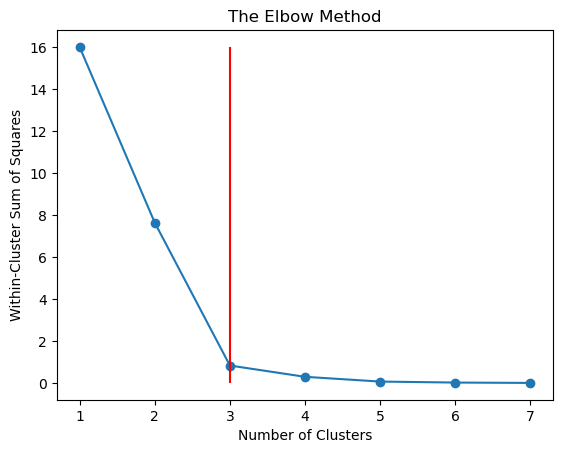

In [ ]:
flight_month_data = df_cluster.iloc[:, [6,8]]
flight_month_data_scaled = scaler.fit_transform(flight_month_data)
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, n_init=10).fit(flight_month_data_scaled)
    wcss.append(kmeans.inertia_)
k_elbow = KneeLocator(x = range(1,8),y=wcss,curve='convex',direction='decreasing').elbow
plt.plot(range(1,8),wcss,marker='o')
plt.vlines(k_elbow,np.min(wcss),np.max(wcss),color='red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares");

In [ ]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    y_kmeans = kmeans.fit_predict(flight_month_data_scaled)
    score = silhouette_score(flight_month_data_scaled, y_kmeans)
    print(f'{i} clusters silhouette score is {score}')

2 clusters silhouette score is 0.513660647106354
3 clusters silhouette score is 0.7842281268786652
4 clusters silhouette score is 0.640339650774927
5 clusters silhouette score is 0.44749520176027524
6 clusters silhouette score is 0.32205288090700523
7 clusters silhouette score is 0.09481615032606931


In [ ]:
X = flight_month_data_scaled
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=101)
y_kmeans = kmeans.fit_predict(X)

# we reverse the scaler (AFTER the clusters have been made) so that visually we can see the correct units
X = scaler.inverse_transform(X)
kmeans.cluster_centers_ = scaler.inverse_transform(kmeans.cluster_centers_)

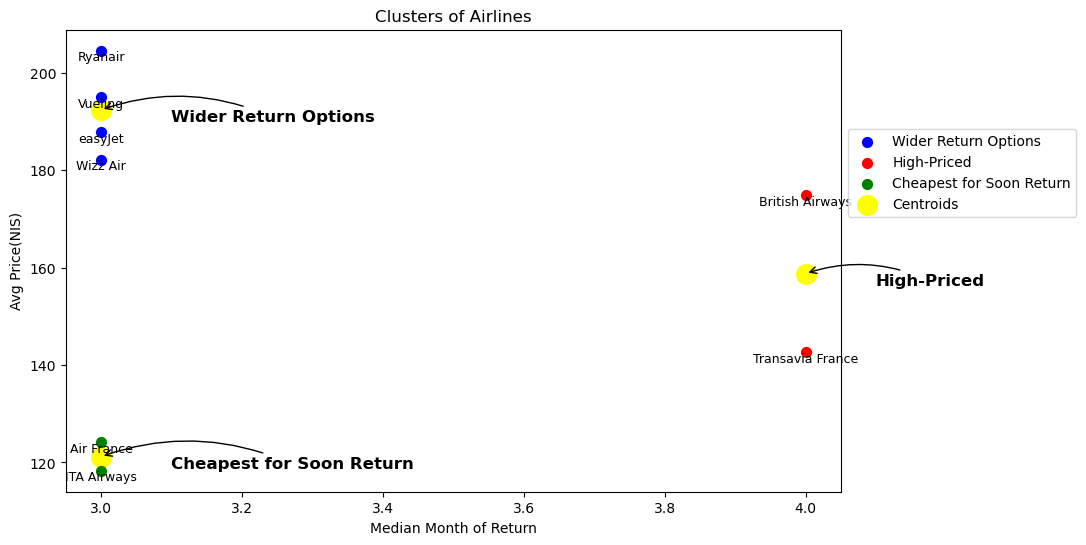

In [ ]:
# scatter plot for the clusters
plt.figure(figsize=(10,6))
label = ['Wider Return Options', 'High-Priced', 'Cheapest for Soon Return']
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 50, c = 'blue', label= 'Wider Return Options',zorder=3)
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 50, c = 'red', label= 'High-Priced',zorder=3)
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 50, c = 'green', label= 'Cheapest for Soon Return',zorder=3)

plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], s=200, c='yellow', label='Centroids', zorder=1)

plt.title('Clusters of Airlines')
plt.xlabel('Median Month of Return')
plt.ylabel('Avg Price(NIS)')

for i, txt in enumerate(flight_month_data.index):
    plt.text(X[i, 0], X[i, 1], txt, fontsize=9, ha='center', va='top', color='black')

for label,x,y in zip(label, kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(50,0), 
                va='top', fontsize=12, fontweight='bold', textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black', connectionstyle='arc3,rad=0.2'))

plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

## Violin Plot:

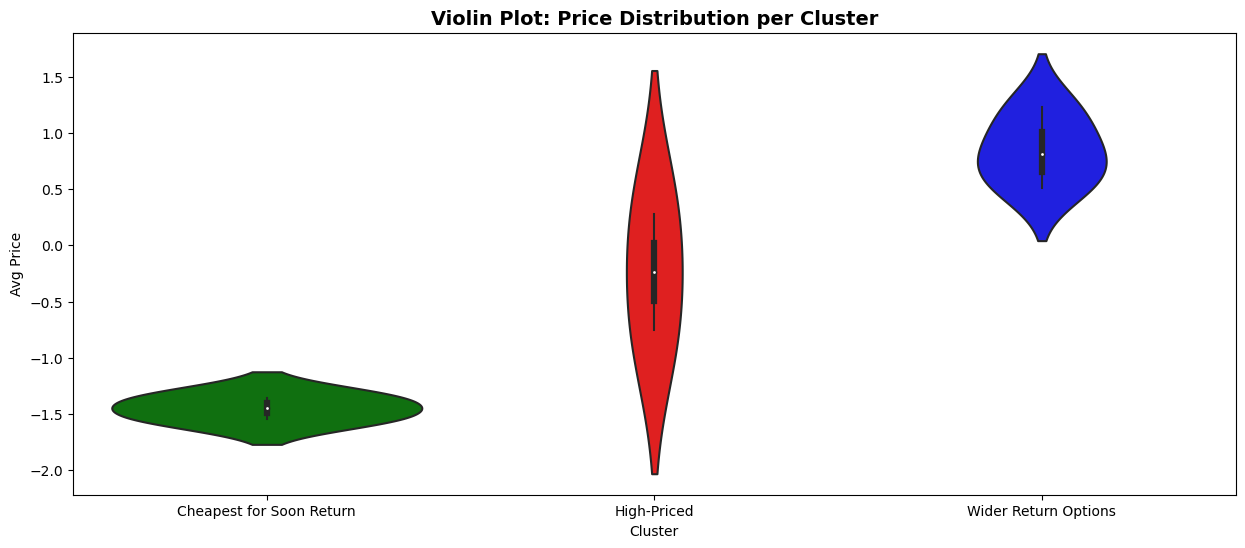

In [ ]:
df_clustered = pd.DataFrame(flight_month_data_scaled, columns=['medRetMonth', 'avgPrice'])
df_clustered['Cluster'] = y_kmeans  # Add cluster labels

cluster_names = {0: 'Wider Return Options', 1: 'High-Priced', 2: 'Cheapest for Soon Return'}
df_clustered['Cluster'] = df_clustered['Cluster'].replace(cluster_names)
custom_palette = {'Wider Return Options': 'blue', 'High-Priced': 'red', 'Cheapest for Soon Return': 'green'}

plt.figure(figsize=(15,6))
sns.violinplot(data=df_clustered, x='Cluster', y='avgPrice', palette=custom_palette)

plt.title("Violin Plot: Price Distribution per Cluster", fontsize=14, fontweight='bold')
plt.ylabel("Avg Price")
plt.show()

In [ ]:
df_cluster.corr()['avgPrice']

avgOnwardFlightDurationMin    0.524754
avgReturnFlightDurationMin    0.504793
medTTT                        0.233812
avgCarryOns                   0.705742
medDepDay                    -0.516458
medRetDay                    -0.413481
medRetMonth                   0.423419
avgPrice                      1.000000
priceStd                     -0.525538
flightsCount                 -0.665995
Name: avgPrice, dtype: float64

### 💡Insights:
- The fairly low correlation explains why the graph looks like this.
- Most of the airlines median return month is the same yet different price ranges.
- We can't really infer anything from this except maybe that Transavia France and British Airways offer wider variety of long term flights, but the price will be accordingly.
___

<h1 style="text-align:center;font-size:300%;font-family:verdana; font-weight:bold;">
Conclusion
</h1>


##### 🔎 We have dissected and determined factors which airlines use to calculate their pricing policy and how they correlate with each of the main airlines.

##### 📊 Different criteria lead to different airlines having similar policies, so we have dissected them to a few different individual fields to compare and discuss.

##### 🎯 It is fairly difficult to base them all on multiple criteria but with the help of dimension reduction we can see similarities in the general approach for the airlines.

---

### **Key Business Insights**

1. Marketing Focus:
   - "High Quantity, Low Quality" airlines can focus on low-budget customers, offering affordable flights with less emphasis on service quality.
   - "Low Quantity, High Quality" airlines can appeal to high-income travelers who value quality over frequency.

2. Service and Product Differentiation:
   - "Good Value" airlines offer a balanced service, catering to a wider audience looking for both affordability and reasonable quality. Marketing efforts should focus on promoting the best value for money.
   - Premium Services: Airlines with a focus on fewer flights but higher quality can use this to differentiate themselves by offering exclusive services.

3. Seasonal Adjustments:
   - Airlines need to adjust their pricing strategies based on the Return Month and the Price Standard Deviation. For instance, peak seasons might require increased prices, while off-peak periods could focus on offering more budget-friendly flights.

4. Clustering Methodology for Pricing Segmentation:
   - Using K-Means Clustering along with PCA for dimensionality reduction helped in segmenting airlines into meaningful categories. This allows airlines to understand their positioning in the market and adjust their strategies accordingly.

### <span style="color:red">Note on Conclusions:</span>
The conclusions should be taken with caution due to the low correlations between the features. Not all the relationships identified in the clustering are necessarily clear or definitive, so it is important to be cautious when building marketing or pricing strategies based on these results.


---

### Conclusions:

- Clustering helped to identify distinct strategies used by airlines in terms of pricing, service levels, and flight frequencies.
- The results show how different clusters represent distinct marketing and pricing strategies, and each airline can position itself to target a specific audience more effectively.
- Dimension reduction (PCA) was critical in simplifying the data and making it easier to compare and contrast airline strategies.